In [1]:
import numpy as np
import pandas as pd

def generate_honeypot_data(samples=1000):
    np.random.seed(42)
    data = []

    for _ in range(samples):
        attack_type = np.random.choice(['Benign', 'Port Scan', 'Brute Force', 'DDoS'])

        if attack_type == 'Benign':
            port = np.random.choice([80, 443, 8080])
            failed_logins = np.random.poisson(0.5)
            time_between = np.random.normal(5, 1)
            payload_size = np.random.normal(200, 50)

        elif attack_type == 'Port Scan':
            port = np.random.randint(1000, 65535)
            failed_logins = 0
            time_between = np.random.normal(0.2, 0.1)
            payload_size = np.random.normal(50, 10)

        elif attack_type == 'Brute Force':
            port = np.random.choice([22, 21, 23])
            failed_logins = np.random.poisson(10)
            time_between = np.random.normal(0.5, 0.2)
            payload_size = np.random.normal(150, 30)

        elif attack_type == 'DDoS':
            port = np.random.choice([80, 443])
            failed_logins = 0
            time_between = np.random.normal(0.05, 0.01)
            payload_size = np.random.normal(500, 100)

        data.append([port, failed_logins, time_between, payload_size, attack_type])

    df = pd.DataFrame(data, columns=['Port', 'Failed_Logins', 'Time_Between_Req', 'Payload_Size', 'Label'])
    return df

df = generate_honeypot_data(1000)
df.head()


,Port,Failed_Logins,Time_Between_Req,Payload_Size,Label
0,22,7,0.260439,214.249753,Brute Force
1,23,10,0.578516,122.124460,Brute Force
2,443,2,5.022222,178.610354,Benign
3,21,7,0.204734,194.609429,Brute Force
4,443,0,0.061343,489.525445,DDoS


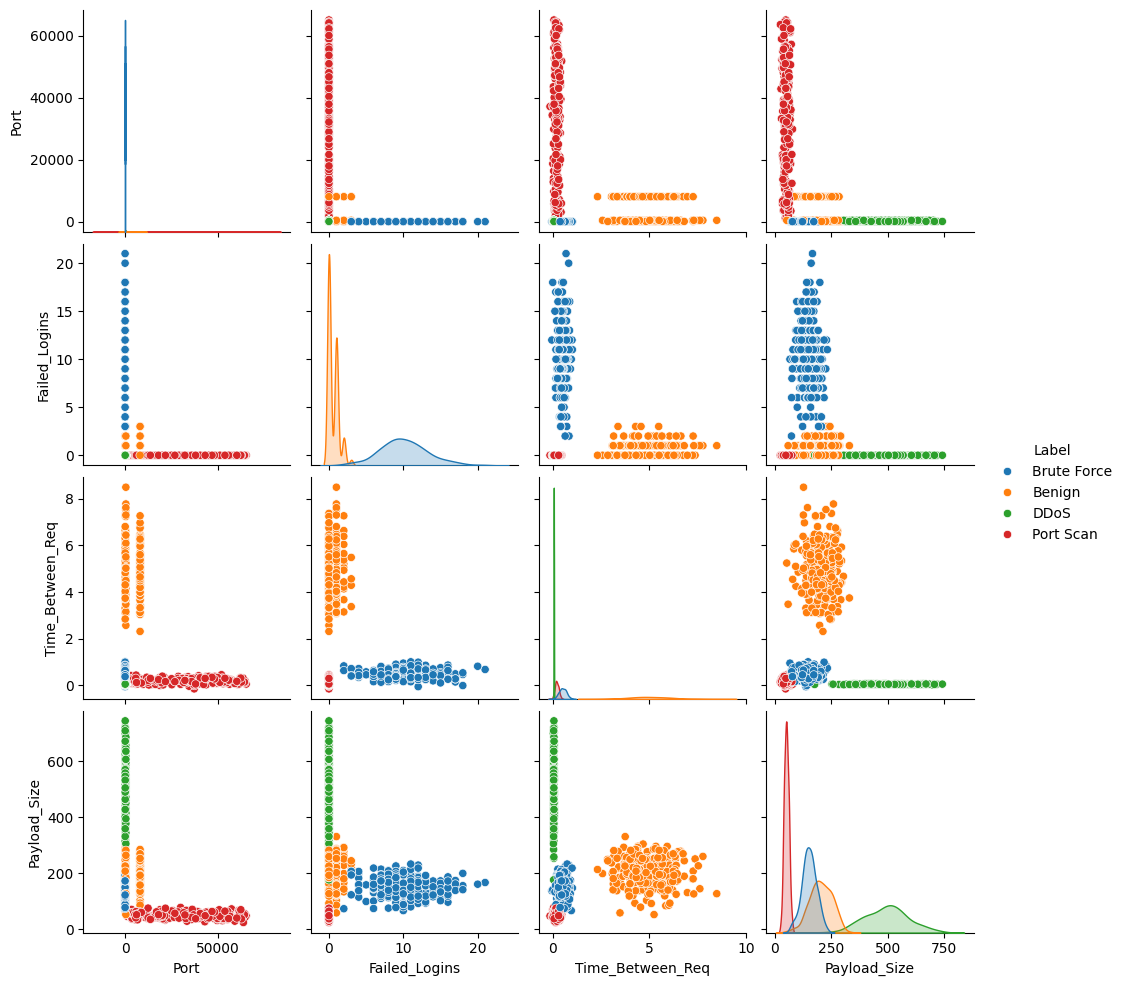

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Label')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df[['Port', 'Failed_Logins', 'Time_Between_Req', 'Payload_Size']]
y = df['Label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        57
 Brute Force       1.00      1.00      1.00        52
        DDoS       1.00      1.00      1.00        50
   Port Scan       1.00      1.00      1.00        41

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



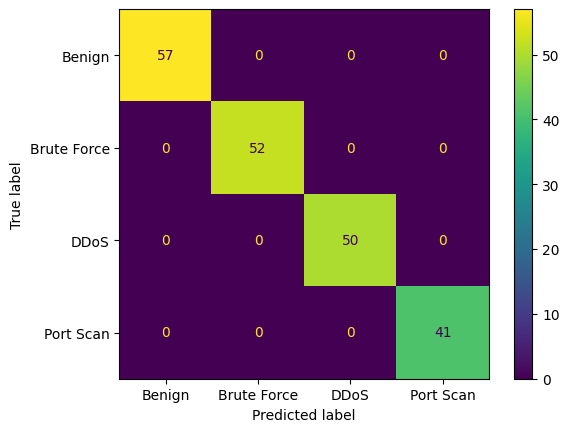

In [4]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.show()
